# Pronóstico de la evolución de pacientes con diabetes

## Descripción del problema real

Los tratamientos médicos están basados en las expectativas de recuperación o el avance de una enfermedad para tomar decisiones. En este caso, un equipo médico desea contar con pronósticos de pacientes con diabetes para tomar decisiones sobre su tratamiento.

## Descripción del problema en términos de los datos

Se desea determinar el progreso de la diabeteis un año hacia adelante a partir de las variables medidas para 442 pacientes. La información está almacenada en el archivo `datos/diabetes.csv`. Las variables medidas son: edad, sexo, indice de masa corporal, presión sanguinea y seis medidas de serum en la sangre. Se desea pronósticar el progreso de la enfermedad a partir de las variables dadas.

## Aproximaciones posibles

En este caso, se desea comparar los resultados de un modelo de regresión lineal y un modelo de redes neuronales artificiales.

## Requerimientos

Usted debe:

* Determinar cuáles de las variables consideradas son relevantes para el problema.


* Determinar si hay alguna transformación de las variables de entrada o de salida que mejore el pronóstico del modelo.


* Construir un modelo de regresión lineal que sirva como base para construir un modelo de redes neuronales artificiales.



* Construir un modelo de redes neuronales artificiales. Asimismo, debe determinar el número de neuronas en la capa o capas ocultas.


* Utiizar una técnica como crossvalidation u otra similar para establecer la robustez del modelo.

# Desarrollo del ejercicio

## Configuración del ambiende de desarrollo - importación de librerias

Lo primero que se debe hacer es configurar el ambiende de desarrolo, importando las librerias necesarias para trabajar.

In [21]:
##Importar las librerias necesarias para trabajar 
import os
import numpy as np 
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor


%matplotlib inline

## Lectura de datos
En primer lugar se leen los datos provenientes del archivo diabetes.cvs facilitado por el profesor. Para esto se hace uso de la libreria pandas (pd) y sus funciones. 

In [22]:
#Extraer los datos de precios de la electricidad

##Este es la direccion donde estan todos los Exceles de donde saldran los datos
ruta  = r'C:\Users\nelson.barco\NFBB\Redes Neuronales\evaluacion-nfbarcob03-master\evaluacion-nfbarcob03-master\datos\diabetes.csv'

dataFrame = pd.read_csv(ruta)
dataFrame.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Escalamiento de datos

Como existen valores negativos todos los valors deben escalarse para que estos negativos no alteren el comportamiento del modelo

In [23]:
scaler = MinMaxScaler()
dataFrameScalar = pd.DataFrame(scaler.fit_transform(dataFrame), columns=dataFrame.columns)
dataFrameScalar.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394,0.392523
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222443,0.166667,0.155763
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496584,0.409091,0.361371
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572936,0.469697,0.563863
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362369,0.333333,0.342679


In [24]:
dataFrameScalar.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,0.491968,0.468326,0.346107,0.459818,0.451668,0.367725,0.360889,0.291996,0.485557,0.503942,0.396054
std,0.218484,0.499561,0.182567,0.194806,0.169647,0.151460,0.167977,0.182010,0.183364,0.174187,0.240165
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.320833,0.000000,0.214876,0.309859,0.329657,0.271165,0.237013,0.141044,0.357528,0.382576,0.193146
50%,0.516667,0.000000,0.318182,0.436620,0.436275,0.355578,0.337662,0.282087,0.478057,0.500000,0.359813
75%,0.666667,1.000000,0.465909,0.605634,0.552696,0.462649,0.464286,0.423131,0.610446,0.606061,0.580997
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Desarrollo modelos

El procedimiento paa buscar el mejor modelo sera el siguiente:
1. Se hara la regresión lineal con solo 1 variable,es decir, se generara un modelo de regresiion lineal por cada variable del set de datos y se escojera el que tenga menor error SSE y MSE
2. Se tomara el mejor modelo del punto anterior y se le agregara 1 variable, esto se hara para todas las variables restantes (es decir, exeptuando la escogida en el punto 1)
3. Se seguira haciendo este procedimiento hasta completar las variables o llegar al modelo con menor error posible

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Para la regresion lineal con la variable age el error cuadratico medio es MSE=0.04646275538073067 y la metrica R^2=0.035622500411056524
Para la regresion lineal con la variable sex el error cuadratico medio es MSE=0.048192826567070586 y la metrica R^2=-0.0002867286288834592
Para la regresion lineal con la variable bmi el error cuadratico medio es MSE=0.04058019051024968 y la metrica R^2=0.15772057992609467
Para la regresion lineal con la variable bp el error cuadratico medio es MSE=0.041536264660869064 y la metrica R^2=0.1378763758697349
Para la regresion lineal con la variable s1 el error cuadratico medio es MSE=0.046338518534922615 y la metrica R^2=0.03820115115476341

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p


Para la regresion lineal con la variable s2 el error cuadratico medio es MSE=0.04633685862172258 y la metrica R^2=0.038235604189850725
Para la regresion lineal con la variable s3 el error cuadratico medio es MSE=0.04509603407120832 y la metrica R^2=0.06399006639614913
Para la regresion lineal con la variable s4 el error cuadratico medio es MSE=0.04099013856367014 y la metrica R^2=0.14921172857882947
Para la regresion lineal con la variable s5 el error cuadratico medio es MSE=0.0371605854454314 y la metrica R^2=0.22869764865497189
Para la regresion lineal con la variable s6 el error cuadratico medio es MSE=0.04122887187652177 y la metrica R^2=0.14425659766956955
Para el modelo de regresion lineal con 1 variable, el menor error MSE fue de 0.0371605854454314 y fue con la variable s5
Para el modelo de regresion lineal con 1 variable, el menor error R^2 fue de 0.035622500411056524 y fue con la variable age


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

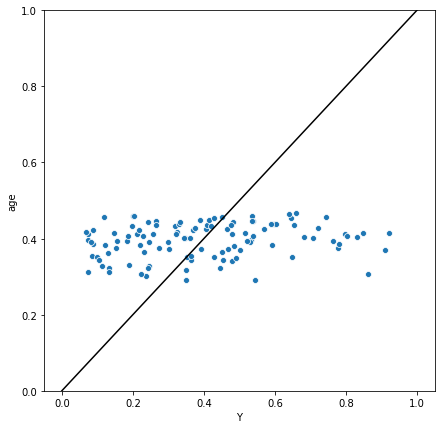

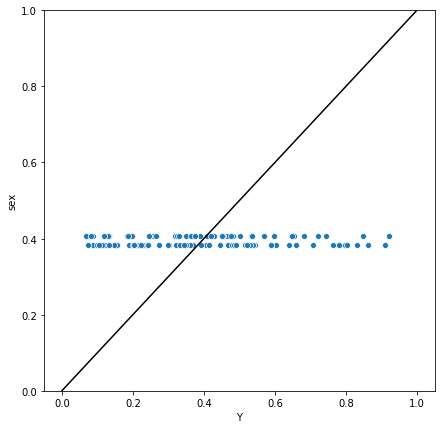

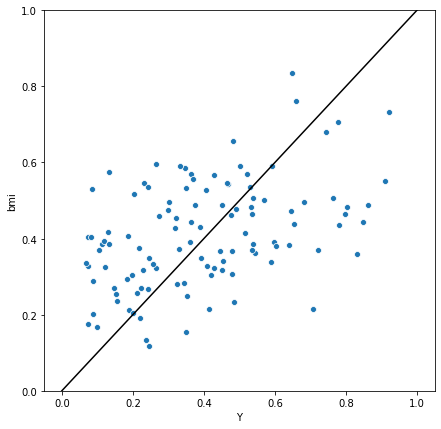

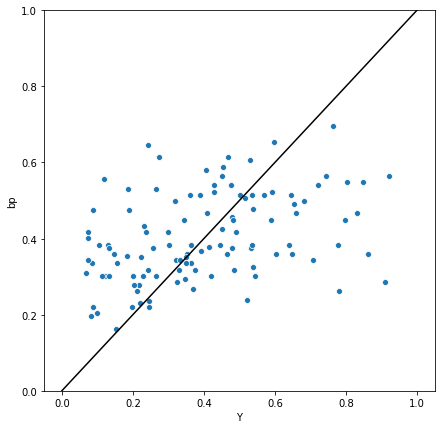

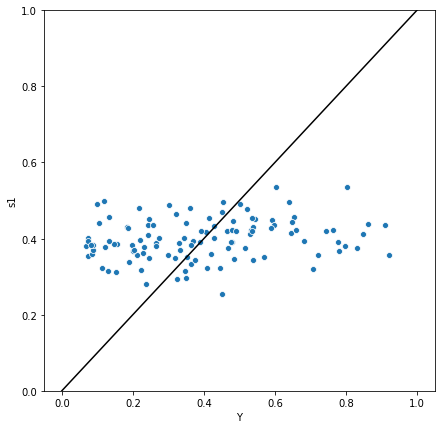

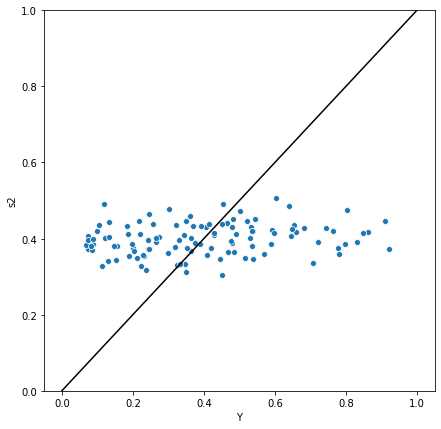

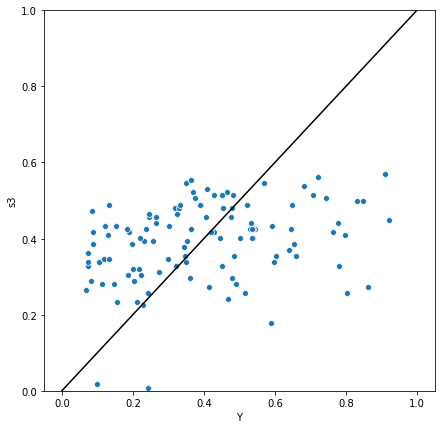

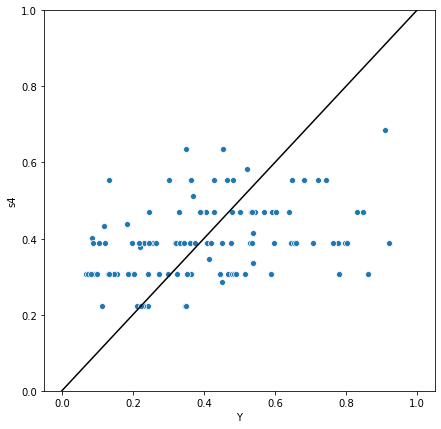

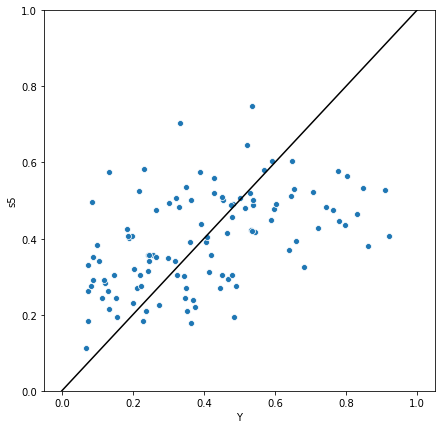

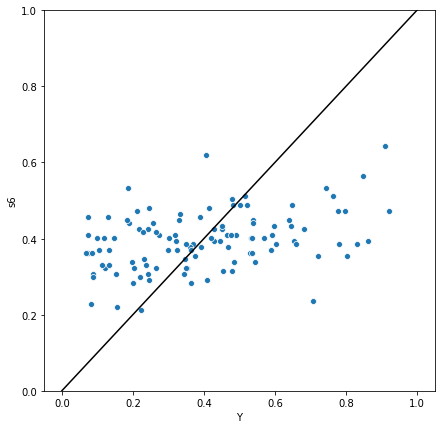

In [57]:
variables=dataFrame.columns
variables=variables[:-1]

MSEoptimo=None
R2optimo=None
variableMSEoptima=None
variableR2optima=None
for i in variables:
    MSE=0
    R2=0
    x=dataFrameScalar.loc[:,[i]]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)
    
    xEntrenamiento=xEntrenamiento.transpose()
    xEntrenamiento=xEntrenamiento.values.reshape(-1,1)
    
    yEntrenamiento=yEntrenamiento.transpose()
    yEntrenamiento=yEntrenamiento.values.reshape(-1,1)
    
    xValidacion=xValidacion.transpose()
    xValidacion=xValidacion.values.reshape(-1,1)
    
    #yValidacion=yValidacion.transpose()
    #yValidacion=yValidacion.values.reshape(-1,1)
    
    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    R2=r2_score(yValidacion,yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    print('Para la regresion lineal con la variable {} el error cuadratico medio es MSE={} y la metrica R^2={}'.
          format(i, MSE,R2))
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if R2optimo==None or MSE<MSEoptimo:
        R2optimo=R2
        variableR2optima=i

print("Para el modelo de regresion lineal con 1 variable, el menor error MSE fue de {} y fue con la variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 1 variable, el menor error R^2 fue de {} y fue con la variable {}".
      format(R2optimo,variableR2optima))

De las graficas y los datos presentados, se concluye que la primera variable a tomar para el modelo de regresion lineal es S5

C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Para la regresion lineal con las variables s5 y age, el error cuadratico medio es MSE=0.03699065313126084 y la metrica R^2=0.2322247511459089
Para la regresion lineal con las variables s5 y sex, el error cuadratico medio es MSE=0.03697120664438518 y la metrica R^2=0.23262838098308203
Para la regresion lineal con las variables s5 y bmi, el error cuadratico medio es MSE=0.03488652565742052 y la metrica R^2=0.2758978647055942
Para la regresion lineal con las variables s5 y bp, el error cuadratico medio es MSE=0.03383704907738626 y la metrica R^2=0.29768072264927825


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

Para la regresion lineal con las variables s5 y s1, el error cuadratico medio es MSE=0.03768340185649639 y la metrica R^2=0.21784611005991006
Para la regresion lineal con las variables s5 y s2, el error cuadratico medio es MSE=0.03726863535178798 y la metrica R^2=0.2264549728242098
Para la regresion lineal con las variables s5 y s3, el error cuadratico medio es MSE=0.03683877679089045 y la metrica R^2=0.23537708518578504
Para la regresion lineal con las variables s5 y s4, el error cuadratico medio es MSE=0.03654733022849427 y la metrica R^2=0.24142632838723288


C:\Users\nelson.barco\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Para la regresion lineal con las variables s5 y s6, el error cuadratico medio es MSE=0.03525853205165437 y la metrica R^2=0.26817652761823063
Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MSE fue de 0.03383704907738626 y fue con la segunda variable bp
Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error R^2 fue de 0.2322247511459089 y fue con la segunda variable age


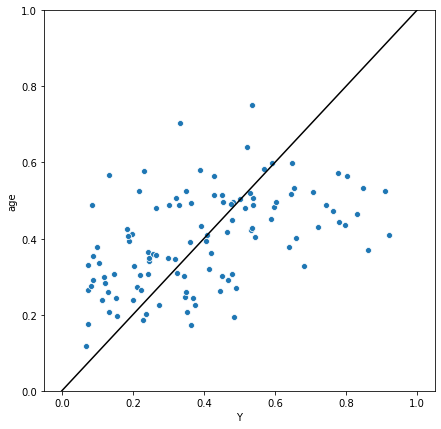

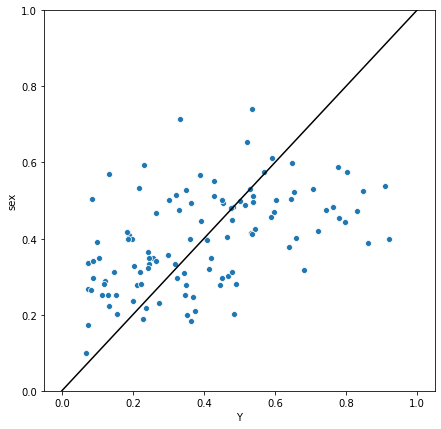

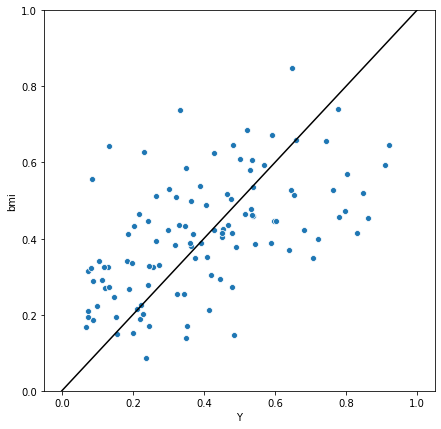

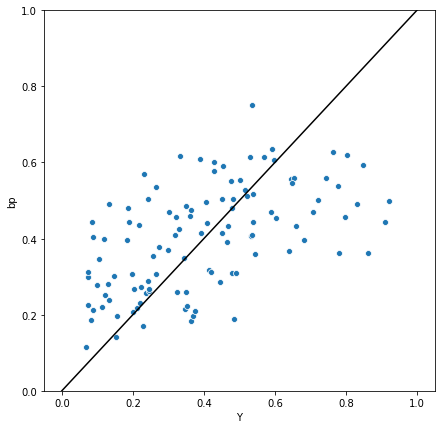

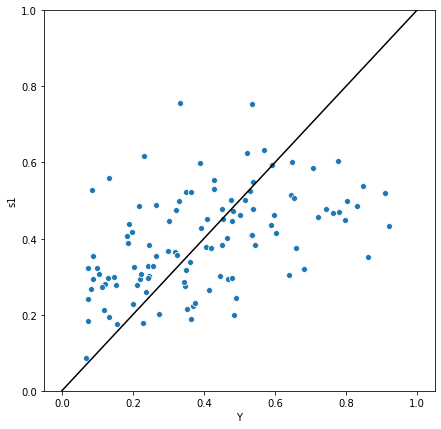

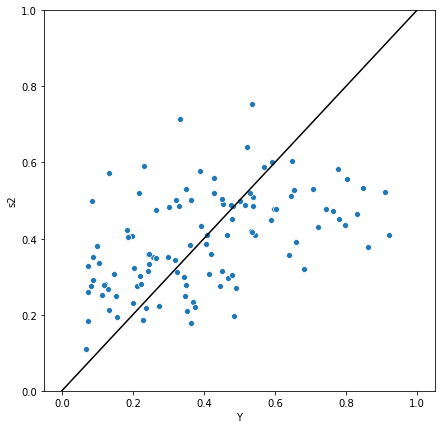

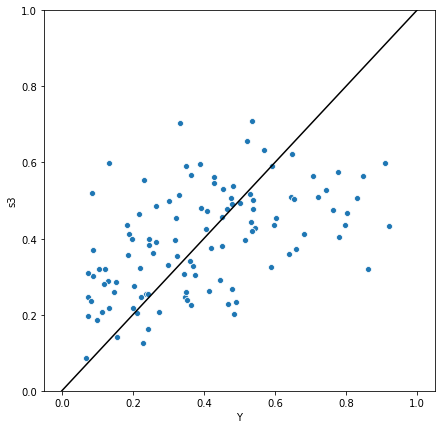

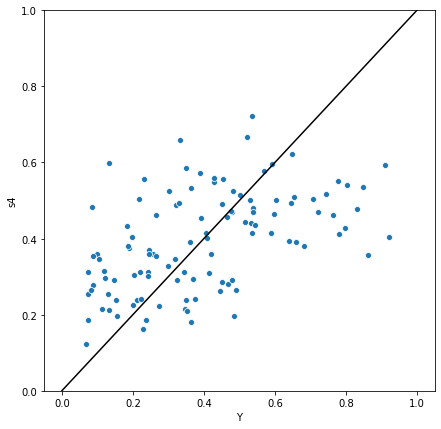

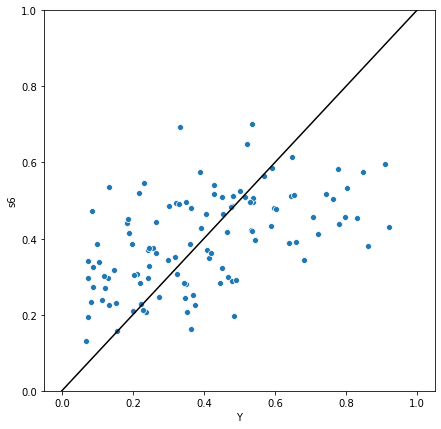

In [62]:
variables=['age','sex','bmi','bp','s1','s2','s3','s4','s6']

MSEoptimo=None
R2optimo=None
variableMSEoptima=None
variableR2optima=None
for i in variables:
    MSE=0
    R2=0
    x=dataFrameScalar.loc[:,[i, 's5']]
    y=dataFrameScalar.loc[:,['Y']]
    xEntrenamiento, xValidacion, yEntrenamiento, yValidacion = train_test_split(x, y, test_size=0.25, random_state=0)
    

    model=linear_model.LinearRegression()
    model.fit(xEntrenamiento,yEntrenamiento)
    yPrediccion=model.predict(xValidacion)
    MSE=mean_squared_error(yValidacion,yPrediccion)
    R2=r2_score(yValidacion,yPrediccion)
    
    plt.figure(figsize=(7, 7))
    yValidacion[i] = yPrediccion
    sns.scatterplot(x='Y', y=i, data= yValidacion)
    plt.plot([0, 1], [0, 1], color='black')
    plt.ylim(0,1)
    
    print('Para la regresion lineal con las variables s5 y {}, el error cuadratico medio es MSE={} y la metrica R^2={}'.
          format(i, MSE,R2))
    if MSEoptimo==None or MSE<MSEoptimo:
        MSEoptimo=MSE
        variableMSEoptima=i
    if R2optimo==None or MSE<MSEoptimo:
        R2optimo=R2
        variableR2optima=i

print("Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error MSE fue de {} y fue con la segunda variable {}".
      format(MSEoptimo,variableMSEoptima))
print("Para el modelo de regresion lineal con 2 variables incluyendo s5, el menor error R^2 fue de {} y fue con la segunda variable {}".
      format(R2optimo,variableR2optima))